Импортируем нужные библиотеки

In [1]:
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Зададим константы: размер выборки (в задании всегда 1000) и параметр используемого распределения

In [2]:
sample_size = 1000
chi2_param = 4

### Хи-квадрат распределение (рапределение Пирсона) с 4 cтепенями свободы

Сгенерируем выборку объёмом в 1000 элементов (sample) и построим по ней гистограмму. Также по 1000 элементов, равномерно распределённым на отрезке [min(sample); max(sample)], построим график PDF данного распределения.

Text(0.5, 0, '$x$')

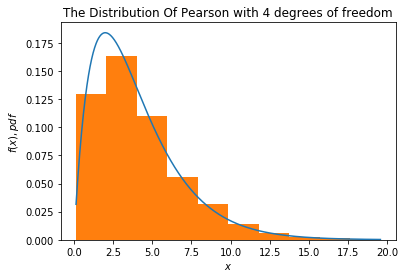

In [7]:
dist = sts.chi2(chi2_param)
sample = dist.rvs(size=sample_size)
X = np.linspace(min(sample), max(sample), sample_size)
plt.plot(X, dist.pdf(X))
plt.hist(sample, bins=10, density=True)
plt.title('The Distribution Of Pearson with 4 degrees of freedom')
plt.ylabel('$f(x), pdf$')
plt.xlabel('$x$')

Реализуем функцию, которая в качестве аргумента принимает количество элементов в одной выборке (n), а выводит график с
1. Гистограммой, построенной по значениям выборочных средних из 1000 выборок
2. Графиком плотности нормального распределения, аппроксимирующего случайную величину, которая характеризует значение выборочного среднего.

Для распределения Пирсона значения математического ожидания и дисперсии следующие: $\mu = k, \sigma^2 = 2k$

Соответственно, нормальное распределение выборочных средних по Центральной Предельной Теореме будет следующим:
$$N(k, \frac{2k}{n})$$

In [8]:
def get_graph(n):
    # Зададим массив значений выборочных средних для 1000 выборок размера n
    average_values = [sum(sample) / n for sample in (dist.rvs(size=n) for i in range(sample_size))]
    plt.hist(average_values, density=True)
    # sts.norm() принимает в качестве второго аргумента среднеквадратичное отклонение,
    # поэтому возьмём квадратный корень из дисперсии
    aver_sample = sts.norm(chi2_param, (((chi2_param * 2) / n) ** 0.5))
    X = np.linspace(min(average_values), max(average_values), sample_size)
    plt.plot(X, aver_sample.pdf(X))
    plt.title('$n = %s$' % (n))
    plt.ylabel('$f(x), pdf$')
    plt.xlabel('$x$')

В дальнейшем попробуем задавать различные размеры выборок на вход функции get_graph()

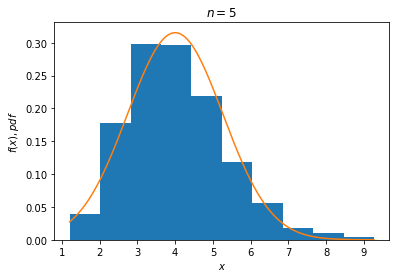

In [9]:
get_graph(5)

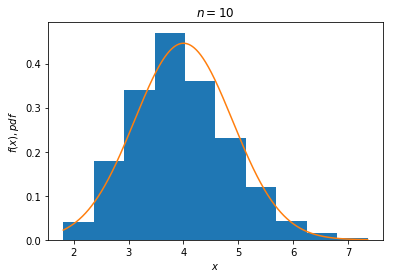

In [14]:
get_graph(10)

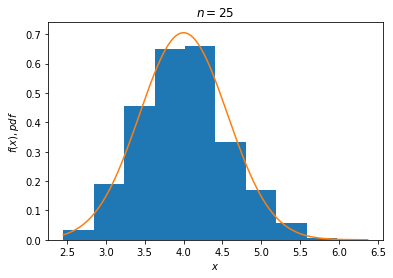

In [11]:
get_graph(25)

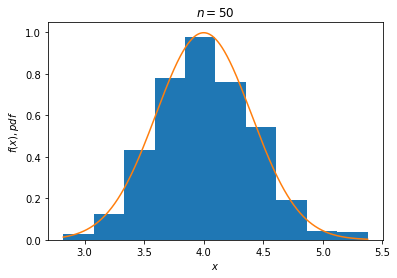

In [15]:
get_graph(50)

В качестве вывода можно сказать следующее: по построенным графикам хорошо видно, что с ростом количества элементов в одной выборке (n) увеличивается и качество аппроксимации соответствующим нормальным распределением распределения случайной величины, задающей выборочное среднее.